In [1]:
import sys
!{sys.executable} -m pip install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

40.21631630440049 21.555990038448556
-25.055568796483982 -158.37028509207644
-58.38621136540496 -139.35646411294755
-7.731907849356304 -177.89266000986817
-63.77473532879122 -130.76062283755445
34.36734148424712 -178.74701524287244
26.138966996790273 135.48362558086308
-30.869151981926592 111.30852941717615
-41.00890318744746 -74.80639146127494
14.91999586827967 113.3951536471381
-25.861038873620203 17.950211867209816
77.74788398246469 -111.05270685052673
-88.38306323307461 -40.36932508469812
-42.603291749694286 -121.06703554464248
-23.652170739198155 16.945515610978248
32.373494414051876 36.56375638384725
-39.05711723463018 -143.86787344753986
62.9193298349727 104.26365430031814
35.077184731311846 173.1600810400817
-16.574008702493316 118.52097409235711
-20.152281479709373 -81.264887070619
-66.61140190494844 82.23418661758944
-0.6716826986383069 -24.446021285085408
56.148215065931566 -103.51699711469331
-1.7675874112421752 163.41922782870552
27.209214331513067 147.1687557527647
31.562

-78.76048927274654 -110.13866192526791
47.611501315864786 114.18898924538831
-82.20852457096228 -5.068209367657147
-28.950749013247012 137.46151824447907
-79.33381563067216 -163.2425393935021
-63.95573401254782 160.42246472037544
58.69760280489996 -119.4176584782422
-83.07469646772367 128.91871280022713
-85.21625145784692 -165.99736786597634
32.91293493345066 -77.83653709770272
36.55995364023293 -126.31883450724426
-16.26472260866538 -86.01961543803283
-15.21542010778596 103.13806319362118
-28.29310761366544 -109.53175444589709
-38.42478728378119 -122.32958160884712
56.35280419200808 -110.45682677728732
17.57574629726544 17.397271900441012
-51.15708517382194 106.92129339592691
82.72004278360126 -8.777464014040305
-19.576624784947413 24.214397843577473
-36.34789426167968 36.58676582553218
-87.34800824183961 -7.743873453249364
-56.75681698073494 151.40683468413022
62.7191384449809 30.1396085885641
54.16572795269187 -91.24681522183485
58.55363147697693 -126.36161542808557
-25.213769703412

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e09726b41590f00ec9484c68c372f777


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | siatista
{'coord': {'lon': 21.5442, 'lat': 40.2619}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.98, 'feels_like': 38.98, 'temp_min': 38.98, 'temp_max': 38.98, 'pressure': 1025, 'humidity': 94, 'sea_level': 1025, 'grnd_level': 915}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 173, 'gust': 3.56}, 'clouds': {'all': 100}, 'dt': 1670112873, 'sys': {'type': 1, 'id': 6628, 'country': 'GR', 'sunrise': 1670132406, 'sunset': 1670166489}, 'timezone': 7200, 'id': 734315, 'name': 'Siátista', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | avarua
{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.45, 'fee

{'coord': {'lon': 14.4283, 'lat': 27.0377}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.17, 'feels_like': 61.5, 'temp_min': 64.17, 'temp_max': 64.17, 'pressure': 1017, 'humidity': 26, 'sea_level': 1017, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 10.49, 'deg': 151, 'gust': 11.92}, 'clouds': {'all': 0}, 'dt': 1670112878, 'sys': {'country': 'LY', 'sunrise': 1670132198, 'sunset': 1670170114}, 'timezone': 7200, 'id': 2212775, 'name': 'Sabha', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 1 | mataura
{'coord': {'lon': 168.8643, 'lat': -46.1927}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.87, 'feels_like': 61.25, 'temp_min': 62.87, 'temp_max': 62.87, 'pressure': 1009, 'humidity': 51, 'sea_level': 1009, 'grnd_level': 1003}, 'v

{'coord': {'lon': -171.5986, 'lat': -13.8745}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 86.79, 'feels_like': 99.39, 'temp_min': 86.79, 'temp_max': 86.79, 'pressure': 1009, 'humidity': 76, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 10.13, 'deg': 81, 'gust': 10.51}, 'rain': {'1h': 0.32}, 'clouds': {'all': 39}, 'dt': 1670112883, 'sys': {'type': 2, 'id': 47733, 'country': 'WS', 'sunrise': 1670172597, 'sunset': 1670219033}, 'timezone': 46800, 'id': 4035249, 'name': 'Lufilufi', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 1 | zhanatas
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 1 | shenjiamen
{'coord': {'lon': 122.298, 'lat': 29.9576}, 'weather': [{

{'coord': {'lon': 114.0833, 'lat': 71.9167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 8.22, 'feels_like': -4.38, 'temp_min': 8.22, 'temp_max': 8.22, 'pressure': 991, 'humidity': 93, 'sea_level': 991, 'grnd_level': 990}, 'visibility': 146, 'wind': {'speed': 24.18, 'deg': 285, 'gust': 42.37}, 'snow': {'1h': 0.45}, 'clouds': {'all': 100}, 'dt': 1670112736, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 32400, 'id': 2017155, 'name': 'Saskylakh', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 1 | meadow lake
{'coord': {'lon': -106.5436, 'lat': 34.8014}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 42.37, 'feels_like': 37.81, 'temp_min': 37.94, 'temp_max': 47.68, 'pressure': 1024, 'humidity': 78, 'sea_level': 1024, 'grnd_level': 839

{'coord': {'lon': 72.4042, 'lat': 57.509}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.11, 'feels_like': -9.8, 'temp_min': 1.11, 'temp_max': 1.11, 'pressure': 1036, 'humidity': 95, 'sea_level': 1036, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 5.41, 'deg': 256, 'gust': 17.27}, 'clouds': {'all': 99}, 'dt': 1670112894, 'sys': {'country': 'RU', 'sunrise': 1670124689, 'sunset': 1670149787}, 'timezone': 21600, 'id': 1489661, 'name': 'Tevriz', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 2 | faya
{'coord': {'lon': 42.4509, 'lat': 18.3851}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50.52, 'feels_like': 49.23, 'temp_min': 50.52, 'temp_max': 50.52, 'pressure': 1017, 'humidity': 84, 'sea_level': 1017, 'grnd_level': 787}, 'visibilit

{'coord': {'lon': 17.691, 'lat': -14.6585}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.91, 'feels_like': 66.76, 'temp_min': 67.91, 'temp_max': 67.91, 'pressure': 1009, 'humidity': 50, 'sea_level': 1009, 'grnd_level': 864}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 44, 'gust': 7.14}, 'clouds': {'all': 68}, 'dt': 1670112900, 'sys': {'country': 'AO', 'sunrise': 1670127076, 'sunset': 1670173669}, 'timezone': 3600, 'id': 3347353, 'name': 'Menongue', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | belushya guba
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 2 | karamea
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data

{'coord': {'lon': -127.4199, 'lat': 50.6996}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 37.33, 'feels_like': 33.94, 'temp_min': 37.33, 'temp_max': 37.33, 'pressure': 1022, 'humidity': 68, 'sea_level': 1022, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 4.29, 'deg': 97, 'gust': 6.02}, 'clouds': {'all': 3}, 'dt': 1670112907, 'sys': {'country': 'CA', 'sunrise': 1670083950, 'sunset': 1670113620}, 'timezone': -28800, 'id': 6111862, 'name': 'Port Hardy', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 2 | hun
{'coord': {'lon': 15.9477, 'lat': 29.1268}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.49, 'feels_like': 59.95, 'temp_min': 62.49, 'temp_max': 62.49, 'pressure': 1017, 'humidity': 32, 'sea_level': 1017, 'grnd_level': 987}, 'visibil

{'coord': {'lon': 173.1667, 'lat': -35.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.99, 'feels_like': 66.22, 'temp_min': 66.99, 'temp_max': 66.99, 'pressure': 1018, 'humidity': 60, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.41, 'deg': 199, 'gust': 8.46}, 'clouds': {'all': 1}, 'dt': 1670112669, 'sys': {'country': 'NZ', 'sunrise': 1670087170, 'sunset': 1670138926}, 'timezone': 46800, 'id': 2194098, 'name': 'Ahipara', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 2 | port alfred
{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.18, 'feels_like': 61.27, 'temp_min': 61.18, 'temp_max': 61.18, 'pressure': 1014, 'humidity': 91}, 'visibility': 10000, 'wind': {'spe

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 3 | puerto ayora
{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.55, 'feels_like': 70.63, 'temp_min': 69.55, 'temp_max': 73.36, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 141, 'gust': 11.01}, 'clouds': {'all': 77}, 'dt': 1670112922, 'sys': {'type': 2, 'id': 2005652, 'country': 'EC', 'sunrise': 1670067999, 'sunset': 1670111774}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 3 | pisco
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky

{'coord': {'lon': 128.5114, 'lat': 43.3067}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 1.2, 'feels_like': -11.4, 'temp_min': 1.2, 'temp_max': 1.2, 'pressure': 1033, 'humidity': 75, 'sea_level': 1033, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 14.05, 'deg': 269, 'gust': 28.12}, 'clouds': {'all': 12}, 'dt': 1670112927, 'sys': {'country': 'CN', 'sunrise': 1670107273, 'sunset': 1670140264}, 'timezone': 28800, 'id': 2037820, 'name': 'Dashitou', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | ishigaki
{'coord': {'lon': 124.1572, 'lat': 24.3448}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.16, 'feels_like': 78.1, 'temp_min': 77.16, 'temp_max': 77.16, 'pressure': 1017, 'humidity': 75, 'sea_level': 1017, 'grnd_level': 1015}, 

{'coord': {'lon': 92.75, 'lat': 11.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.02, 'feels_like': 84.56, 'temp_min': 80.02, 'temp_max': 80.02, 'pressure': 1009, 'humidity': 82, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 11.56, 'deg': 31, 'gust': 16.62}, 'clouds': {'all': 100}, 'dt': 1670112933, 'sys': {'country': 'IN', 'sunrise': 1670111693, 'sunset': 1670153014}, 'timezone': 19800, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 3 | saint-augustin
{'coord': {'lon': -58.6502, 'lat': 51.226}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32.02, 'feels_like': 21.11, 'temp_min': 32.02, 'temp_max': 32.02, 'pressure': 1023, 'humidity': 83, 'sea_level': 1023, 'grn

Processing Record 1 of Set 4 | pangnirtung
{'coord': {'lon': -65.7125, 'lat': 66.1451}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -3.82, 'feels_like': -16.42, 'temp_min': -3.82, 'temp_max': -3.82, 'pressure': 1019, 'humidity': 79, 'sea_level': 1019, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 9.89, 'deg': 60, 'gust': 8.95}, 'clouds': {'all': 36}, 'dt': 1670112939, 'sys': {'country': 'CA', 'sunrise': 1670077174, 'sunset': 1670090768}, 'timezone': -18000, 'id': 6096551, 'name': 'Pangnirtung', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 4 | hamilton
{'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34.99, 'feels_like': 28.45, 'temp_min': 29.98, 'temp_max': 38.08, 'pressure': 1031, 'humi

{'coord': {'lon': 10.7002, 'lat': 46.6166}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.53, 'feels_like': 34.03, 'temp_min': 32.68, 'temp_max': 40.08, 'pressure': 1017, 'humidity': 99, 'sea_level': 1017, 'grnd_level': 915}, 'visibility': 2403, 'wind': {'speed': 4.45, 'deg': 139, 'gust': 5.41}, 'clouds': {'all': 97}, 'dt': 1670112943, 'sys': {'type': 1, 'id': 6813, 'country': 'IT', 'sunrise': 1670136253, 'sunset': 1670167849}, 'timezone': 3600, 'id': 3175096, 'name': 'Laas', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 4 | ust-bolsheretsk
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 4 | nizhneyansk
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----

{'coord': {'lon': 150.6667, 'lat': -10.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.2, 'feels_like': 87.04, 'temp_min': 82.2, 'temp_max': 82.2, 'pressure': 1007, 'humidity': 71, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 4.34, 'deg': 269, 'gust': 7.92}, 'clouds': {'all': 100}, 'dt': 1670112949, 'sys': {'country': 'PG', 'sunrise': 1670095579, 'sunset': 1670141321}, 'timezone': 36000, 'id': 2132606, 'name': 'Samarai', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 4 | iracoubo
{'coord': {'lon': -53.2011, 'lat': 5.4802}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.71, 'feels_like': 78.17, 'temp_min': 76.71, 'temp_max': 76.71, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level':

{'coord': {'lon': 178.4167, 'lat': 69.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.98, 'feels_like': -3.62, 'temp_min': 8.98, 'temp_max': 8.98, 'pressure': 1009, 'humidity': 78, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 9.37, 'deg': 116, 'gust': 16.13}, 'clouds': {'all': 100}, 'dt': 1670112924, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 43200, 'id': 2123814, 'name': 'Leningradskiy', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | hami
{'coord': {'lon': 93.45, 'lat': 42.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.4, 'feels_like': 11.8, 'temp_min': 19.4, 'temp_max': 19.4, 'pressure': 1038, 'humidity': 53, 'sea_level': 1038, 'grnd_level': 945}, 'visibility': 10000, 'win

{'coord': {'lon': 110.9311, 'lat': 26.5222}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41.68, 'feels_like': 39.65, 'temp_min': 41.68, 'temp_max': 41.68, 'pressure': 1029, 'humidity': 92, 'sea_level': 1029, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 19, 'gust': 5.21}, 'clouds': {'all': 100}, 'dt': 1670112960, 'sys': {'country': 'CN', 'sunrise': 1670108962, 'sunset': 1670147016}, 'timezone': 28800, 'id': 1817446, 'name': 'Baisha', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 5 | ourossogui
{'coord': {'lon': -13.3211, 'lat': 15.6064}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.65, 'feels_like': 75.92, 'temp_min': 77.65, 'temp_max': 77.65, 'pressure': 1008, 'humidity': 17, 'sea_level': 1008, 'grnd_level

{'coord': {'lon': 32.4264, 'lat': 35.0367}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 58.82, 'feels_like': 57.65, 'temp_min': 58.82, 'temp_max': 58.82, 'pressure': 1019, 'humidity': 69, 'sea_level': 1019, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 3.31, 'deg': 44, 'gust': 3.65}, 'clouds': {'all': 78}, 'dt': 1670112965, 'sys': {'type': 1, 'id': 6374, 'country': 'CY', 'sunrise': 1670128955, 'sunset': 1670164715}, 'timezone': 7200, 'id': 146137, 'name': 'Polis', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 5 | nome
{'coord': {'lon': -165.4064, 'lat': 64.5011}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 33.87, 'feels_like': 23.61, 'temp_min': 32.11, 'temp_ma

{'coord': {'lon': 81.1185, 'lat': 6.1241}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.54, 'feels_like': 76.93, 'temp_min': 75.54, 'temp_max': 75.54, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 25, 'gust': 10.33}, 'clouds': {'all': 93}, 'dt': 1670112969, 'sys': {'country': 'LK', 'sunrise': 1670113931, 'sunset': 1670156360}, 'timezone': 19800, 'id': 1244926, 'name': 'Hambantota', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 5 | tall kayf
{'coord': {'lon': 41.0667, 'lat': 37.0833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.19, 'feels_like': 51.08, 'temp_min': 53.19, 'temp_max': 53.19, 'pressure': 1020, 'humidity': 61, 'sea_level': 1020, 'grnd_level': 962

{'coord': {'lon': 4.2658, 'lat': 39.8885}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.76, 'feels_like': 48.76, 'temp_min': 48.76, 'temp_max': 48.76, 'pressure': 1010, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1670112975, 'sys': {'type': 1, 'id': 6422, 'country': 'ES', 'sunrise': 1670136491, 'sunset': 1670170700}, 'timezone': 3600, 'id': 2514301, 'name': 'Mahon', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 5 | thompson
{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -18.24, 'feels_like': -30.84, 'temp_min': -18.24, 'temp_max': -18.24, 'pressure': 1009, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 270}, 'clouds': {'all': 20

{'coord': {'lon': -91.917, 'lat': 50.1001}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 1.47, 'feels_like': -11.13, 'temp_min': 1.47, 'temp_max': 1.47, 'pressure': 1016, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 250, 'gust': 23.02}, 'clouds': {'all': 40}, 'dt': 1670112982, 'sys': {'type': 1, 'id': 979, 'country': 'CA', 'sunrise': 1670075264, 'sunset': 1670105260}, 'timezone': -21600, 'id': 6148373, 'name': 'Sioux Lookout', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 6 | burgersdorp
{'coord': {'lon': 26.3286, 'lat': -30.9977}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 52.79, 'feels_like': 51.48, 'temp_min': 52.79, 'temp_max': 52.79, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 857}, 'vi

{'coord': {'lon': 121.6247, 'lat': 63.7553}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -16.91, 'feels_like': -29.04, 'temp_min': -16.91, 'temp_max': -16.91, 'pressure': 1011, 'humidity': 96, 'sea_level': 1011, 'grnd_level': 996}, 'visibility': 7140, 'wind': {'speed': 4.29, 'deg': 241, 'gust': 9.57}, 'clouds': {'all': 100}, 'dt': 1670112987, 'sys': {'country': 'RU', 'sunrise': 1670116382, 'sunset': 1670134461}, 'timezone': 32400, 'id': 2013392, 'name': 'Vilyuysk', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 6 | masvingo
{'coord': {'lon': 30.8277, 'lat': -20.0637}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.3, 'feels_like': 69.62, 'temp_min': 70.3, 'temp_max': 70.3, 'pressure': 1009, 'humidity': 55, 'sea_level': 1009, 'grnd_lev

{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.28, 'feels_like': 73.78, 'temp_min': 72.28, 'temp_max': 72.28, 'pressure': 1009, 'humidity': 97, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.79, 'deg': 60, 'gust': 10}, 'clouds': {'all': 99}, 'dt': 1670112992, 'sys': {'country': 'BR', 'sunrise': 1670055112, 'sunset': 1670105385}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 6 | okha
{'coord': {'lon': 142.9478, 'lat': 53.5739}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 3.06, 'feels_like': -9.54, 'temp_min': 3.06, 'temp_max': 3.06, 'pressure': 1007, 'humidity': 91, 'sea_level': 1007, 'grnd_level': 1005}, 'vis

{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.04, 'feels_like': 86.07, 'temp_min': 78.06, 'temp_max': 84.51, 'pressure': 1015, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1670112812, 'sys': {'type': 1, 'id': 7151, 'country': 'MX', 'sunrise': 1670075119, 'sunset': 1670114046}, 'timezone': -25200, 'id': 3985710, 'name': 'Cabo San Lucas', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 6 | neyshabur
{'coord': {'lon': 58.7958, 'lat': 36.2133}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.3, 'feels_like': 38.3, 'temp_min': 38.3, 'temp_max': 38.3, 'pressure': 1025, 'humidity': 60, 'sea_level': 1025, 'grnd_level': 886}, 'visibility': 10000, 'wind

{'coord': {'lon': -151.75, 'lat': -16.4833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.67, 'feels_like': 85.35, 'temp_min': 80.67, 'temp_max': 80.67, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 19.24, 'deg': 76, 'gust': 21.47}, 'clouds': {'all': 18}, 'dt': 1670113007, 'sys': {'country': 'PF', 'sunrise': 1670081139, 'sunset': 1670128112}, 'timezone': -36000, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | banda aceh
{'coord': {'lon': 95.3222, 'lat': 5.5577}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.19, 'feels_like': 79.41, 'temp_min': 78.19, 'temp_max': 78.19, 'pressure': 1008, 'humidity': 79, 'sea_level': 1008, 'grnd_level': 1

{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.25, 'feels_like': 56.16, 'temp_min': 57.25, 'temp_max': 57.25, 'pressure': 1013, 'humidity': 74, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 21.79, 'deg': 175, 'gust': 27.31}, 'clouds': {'all': 92}, 'dt': 1670113012, 'sys': {'type': 1, 'id': 1943, 'country': 'ZA', 'sunrise': 1670124751, 'sunset': 1670175873}, 'timezone': 7200, 'id': 3361934, 'name': 'Saldanha', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 7 | severo-yeniseyskiy
{'coord': {'lon': 93.0408, 'lat': 60.3725}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -16.37, 'feels_like': -27.31, 'temp_min': -16.37, 'temp_max': -16.37, 'pressure': 1038, 'humidit

{'coord': {'lon': 114.1577, 'lat': 22.2855}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 68.07, 'feels_like': 68.52, 'temp_min': 64.96, 'temp_max': 70.95, 'pressure': 1021, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 10}, 'clouds': {'all': 38}, 'dt': 1670113019, 'sys': {'type': 2, 'id': 2035800, 'country': 'HK', 'sunrise': 1670107688, 'sunset': 1670146741}, 'timezone': 28800, 'id': 1819729, 'name': 'Hong Kong', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 7 | bireun
{'coord': {'lon': 96.7009, 'lat': 5.203}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.64, 'feels_like': 77.81, 'temp_min': 76.64, 'temp_max': 76.64, 'pressure': 1009, 'humidity': 81, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, '

{'coord': {'lon': -70.7581, 'lat': -28.5708}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.69, 'feels_like': 70.72, 'temp_min': 71.69, 'temp_max': 71.69, 'pressure': 1013, 'humidity': 46, 'sea_level': 1013, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 3.8, 'deg': 305, 'gust': 3.76}, 'clouds': {'all': 0}, 'dt': 1670113002, 'sys': {'country': 'CL', 'sunrise': 1670060262, 'sunset': 1670110103}, 'timezone': -10800, 'id': 3868633, 'name': 'Vallenar', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 8 | berlevag
{'coord': {'lon': 29.0864, 'lat': 70.8578}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.4, 'feels_like': 22.33, 'temp_min': 23, 'temp_max': 26.55, 'pressure': 1036, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.

{'coord': {'lon': 75.1, 'lat': 25.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.81, 'feels_like': 55.45, 'temp_min': 57.81, 'temp_max': 57.81, 'pressure': 1015, 'humidity': 46, 'sea_level': 1015, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 2.93, 'deg': 63, 'gust': 3}, 'clouds': {'all': 6}, 'dt': 1670113031, 'sys': {'country': 'IN', 'sunrise': 1670117406, 'sunset': 1670155775}, 'timezone': 19800, 'id': 1263911, 'name': 'Māndalgarh', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 8 | dongsheng
{'coord': {'lon': 109.9776, 'lat': 39.8161}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 14.36, 'feels_like': 4.14, 'temp_min': 14.36, 'temp_max': 14.36, 'pressure': 1038, 'humidity': 33, 'sea_level': 1038, 'grnd_level': 864}, 'visibi

{'coord': {'lon': 128.8694, 'lat': 71.6872}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -9.9, 'feels_like': -22.5, 'temp_min': -9.9, 'temp_max': -9.9, 'pressure': 989, 'humidity': 92, 'sea_level': 989, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 20.38, 'deg': 249, 'gust': 40.85}, 'clouds': {'all': 100}, 'dt': 1670113037, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 32400, 'id': 2015306, 'name': 'Tiksi', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | mokhsogollokh
{'coord': {'lon': 128.9203, 'lat': 61.4681}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -14.21, 'feels_like': -14.21, 'temp_min': -14.21, 'temp_max': -14.21, 'pressure': 1011, 'humidity': 98, 'sea_level': 1011, 'grnd_level': 987}, 'visibility'

{'coord': {'lon': 20.8, 'lat': -6.4167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 70.25, 'feels_like': 71.53, 'temp_min': 70.25, 'temp_max': 70.25, 'pressure': 1008, 'humidity': 97, 'sea_level': 1008, 'grnd_level': 954}, 'visibility': 10000, 'wind': {'speed': 1.92, 'deg': 180, 'gust': 1.99}, 'rain': {'1h': 0.42}, 'clouds': {'all': 99}, 'dt': 1670113042, 'sys': {'country': 'CD', 'sunrise': 1670127177, 'sunset': 1670172075}, 'timezone': 7200, 'id': 204953, 'name': 'Tshikapa', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 8 | el tarra
{'coord': {'lon': -73.0949, 'lat': 8.5756}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.58, 'feels_like': 73.04, 'temp_min': 71.58, 'temp_max': 71.58, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'g

Processing Record 1 of Set 9 | takapau
{'coord': {'lon': 176.35, 'lat': -40.0333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 70.74, 'feels_like': 69.35, 'temp_min': 70.74, 'temp_max': 70.74, 'pressure': 1012, 'humidity': 39, 'sea_level': 1012, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 234, 'gust': 7.96}, 'clouds': {'all': 45}, 'dt': 1670113048, 'sys': {'type': 2, 'id': 2010964, 'country': 'NZ', 'sunrise': 1670085582, 'sunset': 1670138986}, 'timezone': 46800, 'id': 2181988, 'name': 'Takapau', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 9 | ovsyanka
{'coord': {'lon': 92.5519, 'lat': 55.9575}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.77, 'feels_like': -0.06, 'temp_min': 7.77, 'temp_max': 7.77, 'pres

{'coord': {'lon': -82.2665, 'lat': 40.8167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 30.69, 'feels_like': 21.74, 'temp_min': 29.21, 'temp_max': 33.76, 'pressure': 1028, 'humidity': 82, 'sea_level': 1028, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 10.69, 'deg': 287, 'gust': 20.58}, 'clouds': {'all': 6}, 'dt': 1670113053, 'sys': {'type': 2, 'id': 2032410, 'country': 'US', 'sunrise': 1670070976, 'sunset': 1670104915}, 'timezone': -18000, 'id': 5146062, 'name': 'Ashland', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 9 | sur
{'coord': {'lon': 59.5289, 'lat': 22.5667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.17, 'feels_like': 73.15, 'temp_min': 73.17, 'temp_max': 73.17, 'pressure': 1015, 'humidity': 63, 'sea_level': 1015, 'grn

{'coord': {'lon': -63.0578, 'lat': 18.217}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.93, 'feels_like': 77.67, 'temp_min': 76.86, 'temp_max': 78.82, 'pressure': 1012, 'humidity': 71, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 13.98, 'deg': 37, 'gust': 14.07}, 'clouds': {'all': 0}, 'dt': 1670113058, 'sys': {'type': 1, 'id': 8801, 'country': 'AI', 'sunrise': 1670063350, 'sunset': 1670103318}, 'timezone': -14400, 'id': 3573374, 'name': 'The Valley', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 9 | yomitan
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 9 | balao
{'coord': {'lon': -79.8167, 'lat': -2.9167}, 'weather': [{'id': 801, 'main': 'Clouds', 

{'coord': {'lon': -15.2082, 'lat': 64.2539}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.6, 'feels_like': 33.37, 'temp_min': 37.6, 'temp_max': 37.6, 'pressure': 1033, 'humidity': 58, 'sea_level': 1033, 'grnd_level': 1033}, 'visibility': 10000, 'wind': {'speed': 5.35, 'deg': 356, 'gust': 3.69}, 'clouds': {'all': 2}, 'dt': 1670113063, 'sys': {'country': 'IS', 'sunrise': 1670149691, 'sunset': 1670166850}, 'timezone': 0, 'id': 2630299, 'name': 'Hofn', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | tessalit
{'coord': {'lon': 1.0114, 'lat': 20.1986}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.17, 'feels_like': 71.02, 'temp_min': 73.17, 'temp_max': 73.17, 'pressure': 1011, 'humidity': 18, 'sea_level': 1011, 'grnd_level': 953}, 'visibilit

{'coord': {'lon': 91.8167, 'lat': 56.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 5.41, 'feels_like': -2.15, 'temp_min': 5.41, 'temp_max': 5.41, 'pressure': 1041, 'humidity': 95, 'sea_level': 1041, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 3.71, 'deg': 193, 'gust': 10.11}, 'clouds': {'all': 100}, 'dt': 1670113069, 'sys': {'type': 1, 'id': 8957, 'country': 'RU', 'sunrise': 1670119495, 'sunset': 1670145661}, 'timezone': 25200, 'id': 1538641, 'name': 'Kedrovyy', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 10 | porto santo
{'coord': {'lon': -16.3415, 'lat': 33.072}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 59.38, 'feels_like': 58.87, 'temp_min': 59.38, 'temp_max': 59.38, 'pressure': 1006, 'humidity': 82}, 'visi

{'coord': {'lon': 143.3, 'lat': 59.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -17.41, 'feels_like': -30.01, 'temp_min': -17.41, 'temp_max': -17.41, 'pressure': 1004, 'humidity': 94, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 6760, 'wind': {'speed': 9.17, 'deg': 329, 'gust': 13.4}, 'clouds': {'all': 98}, 'dt': 1670113074, 'sys': {'country': 'RU', 'sunrise': 1670108493, 'sunset': 1670131943}, 'timezone': 36000, 'id': 2122605, 'name': 'Okhotsk', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 10 | langres
{'coord': {'lon': 5.3333, 'lat': 47.8333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.19, 'feels_like': 28.69, 'temp_min': 33.19, 'temp_max': 33.19, 'pressure': 1012, 'humidity': 93, 'sea_level': 1012, 'grnd_level':

{'coord': {'lon': 43.8894, 'lat': 4.1213}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.59, 'feels_like': 71.64, 'temp_min': 70.59, 'temp_max': 70.59, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 11.65, 'deg': 117, 'gust': 21.18}, 'clouds': {'all': 58}, 'dt': 1670113079, 'sys': {'country': 'SO', 'sunrise': 1670122672, 'sunset': 1670165494}, 'timezone': 10800, 'id': 49747, 'name': 'Oddur', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 10 | rundu
{'coord': {'lon': 19.7667, 'lat': -17.9333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.25, 'feels_like': 70.86, 'temp_min': 72.25, 'temp_max': 72.25, 'pressure': 1007, 'humidity': 36, 'sea_level': 1007, 'grnd_level': 887}, 'visibi

{'coord': {'lon': 78.0056, 'lat': 42.3414}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.14, 'feels_like': 19.62, 'temp_min': 25.14, 'temp_max': 25.14, 'pressure': 1025, 'humidity': 69, 'sea_level': 1025, 'grnd_level': 825}, 'visibility': 10000, 'wind': {'speed': 4.45, 'deg': 152, 'gust': 5.12}, 'clouds': {'all': 100}, 'dt': 1670113086, 'sys': {'country': 'KG', 'sunrise': 1670119220, 'sunset': 1670152566}, 'timezone': 21600, 'id': 1527497, 'name': 'Kyzyl-Suu', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 10 | zlatoust
{'coord': {'lon': 59.6508, 'lat': 55.1711}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -1.07, 'feels_like': -11.58, 'temp_min': -1.07, 'temp_max': -1.07, 'pressure': 1050, 'humidity': 92, 'sea_level': 1050, 'grnd_level': 

{'coord': {'lon': 70.8342, 'lat': 36.8648}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.04, 'feels_like': 30.56, 'temp_min': 35.04, 'temp_max': 35.04, 'pressure': 1027, 'humidity': 59, 'sea_level': 1027, 'grnd_level': 848}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 150, 'gust': 7}, 'clouds': {'all': 100}, 'dt': 1670113094, 'sys': {'country': 'AF', 'sunrise': 1670120010, 'sunset': 1670155219}, 'timezone': 16200, 'id': 1139085, 'name': 'Jurm', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 11 | columbia
{'coord': {'lon': -81.0348, 'lat': 34.0007}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.18, 'feels_like': 61.36, 'temp_min': 59.34, 'temp_max': 62.51, 'pressure': 1024, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 

{'coord': {'lon': 41.6925, 'lat': 13.9297}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 79.9, 'feels_like': 79.9, 'temp_min': 79.9, 'temp_max': 79.9, 'pressure': 1011, 'humidity': 50, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 14.36, 'deg': 134, 'gust': 20.38}, 'clouds': {'all': 3}, 'dt': 1670113101, 'sys': {'country': 'ER', 'sunrise': 1670124183, 'sunset': 1670165038}, 'timezone': 10800, 'id': 338345, 'name': 'Edd', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 11 | concepcion del uruguay
{'coord': {'lon': -58.2372, 'lat': -32.4825}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.97, 'feels_like': 75.85, 'temp_min': 74.25, 'temp_max': 75.97, 'pressure': 1011, 'humidity': 55}, 'visibility': 10000, 'wind': {'

{'coord': {'lon': 95.3333, 'lat': 28.0667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 59.29, 'feels_like': 57.36, 'temp_min': 59.29, 'temp_max': 59.29, 'pressure': 1015, 'humidity': 52, 'sea_level': 1015, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 3.24, 'deg': 343, 'gust': 3.22}, 'clouds': {'all': 5}, 'dt': 1670113106, 'sys': {'country': 'IN', 'sunrise': 1670112899, 'sunset': 1670150568}, 'timezone': 19800, 'id': 1260206, 'name': 'Pāsighāt', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 11 | chimore
{'coord': {'lon': -65.1333, 'lat': -16.9833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.25, 'feels_like': 77.63, 'temp_min': 77.25, 'temp_max': 77.25, 'pressure': 1005, 'humidity': 63, 'sea_level': 1005, 'grnd_level': 979}

{'coord': {'lon': 80.5353, 'lat': 5.9485}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.61, 'feels_like': 75.99, 'temp_min': 74.61, 'temp_max': 74.61, 'pressure': 1009, 'humidity': 90, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.54, 'deg': 60, 'gust': 5.68}, 'clouds': {'all': 95}, 'dt': 1670113112, 'sys': {'country': 'LK', 'sunrise': 1670114054, 'sunset': 1670156518}, 'timezone': 19800, 'id': 1235846, 'name': 'Matara', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 11 | san ramon
{'coord': {'lon': -121.978, 'lat': 37.7799}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 45.88, 'feels_like': 44.58, 'temp_min': 41.74, 'temp_max': 49.75, 'pr

{'coord': {'lon': 74.45, 'lat': 14.2833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.42, 'feels_like': 77.67, 'temp_min': 76.42, 'temp_max': 76.42, 'pressure': 1010, 'humidity': 83, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 4.54, 'deg': 55, 'gust': 4.99}, 'clouds': {'all': 93}, 'dt': 1670113118, 'sys': {'country': 'IN', 'sunrise': 1670116355, 'sunset': 1670157139}, 'timezone': 19800, 'id': 1269976, 'name': 'Honāvar', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 12 | marabba
{'coord': {'lon': 32.1833, 'lat': 12.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.2, 'feels_like': 79.3, 'temp_min': 80.2, 'temp_max': 80.2, 'pressure': 1008, 'humidity': 30, 'sea_level': 1008, 'grnd_level': 963}, 'visibilit

{'coord': {'lon': 135.1833, 'lat': 35.5333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 43, 'feels_like': 39.9, 'temp_min': 43, 'temp_max': 43, 'pressure': 1024, 'humidity': 70, 'sea_level': 1024, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 5.12, 'deg': 257, 'gust': 8.7}, 'clouds': {'all': 77}, 'dt': 1670113123, 'sys': {'type': 1, 'id': 7965, 'country': 'JP', 'sunrise': 1670104353, 'sunset': 1670139980}, 'timezone': 32400, 'id': 1856703, 'name': 'Miyazu', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 12 | baruun-urt
{'coord': {'lon': 113.2792, 'lat': 46.6806}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -8.61, 'feels_like': -21.21, 'temp_min': -8.61, 'temp_max': -8.61, 'pressure': 1040, 'humidity': 85, 'sea_level': 1040, 'grnd

{'coord': {'lon': 56.9244, 'lat': 33.5959}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.97, 'feels_like': 47.64, 'temp_min': 50.97, 'temp_max': 50.97, 'pressure': 1019, 'humidity': 40, 'sea_level': 1019, 'grnd_level': 941}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 8, 'gust': 5.03}, 'clouds': {'all': 59}, 'dt': 1670113129, 'sys': {'country': 'IR', 'sunrise': 1670122863, 'sunset': 1670159045}, 'timezone': 12600, 'id': 113659, 'name': 'Tabas', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 12 | kongwa
{'coord': {'lon': 36.4167, 'lat': -6.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 66.11, 'feels_like': 66.36, 'temp_min': 66.11, 'temp_max': 66.11, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 898}, 'vis

{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.49, 'feels_like': 56.7, 'temp_min': 57.49, 'temp_max': 57.49, 'pressure': 1014, 'humidity': 80, 'sea_level': 1014, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 4.05, 'deg': 288, 'gust': 4.05}, 'clouds': {'all': 100}, 'dt': 1670113135, 'sys': {'country': 'ZA', 'sunrise': 1670122973, 'sunset': 1670174392}, 'timezone': 7200, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 12 | egvekinot
{'coord': {'lon': -179.1667, 'lat': 66.3167}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 13.59, 'feels_like': 0.99, 'temp_min': 13.59, 'temp_max': 13.59, 'pressure': 1002, 'humidity': 93, 'sea_level': 1002, 'grnd_level': 948}, 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Siatista,40.2619,21.5442,38.98,94,100,2.24,GR,2022-12-04 00:14:33
1,Avarua,-21.2078,-159.7750,82.45,83,100,8.05,CK,2022-12-04 00:13:59
2,Rikitea,-23.1203,-134.9692,74.89,75,30,12.21,PF,2022-12-04 00:14:33
3,Kapaa,22.0752,-159.3190,82.72,68,40,12.66,US,2022-12-04 00:14:34
4,Naze,28.3667,129.4833,68.90,79,99,3.18,JP,2022-12-04 00:14:34
5,Geraldton,-28.7667,114.6000,70.21,78,100,9.22,AU,2022-12-04 00:11:42
6,Ancud,-41.8697,-73.8203,54.10,89,74,5.14,CL,2022-12-04 00:14:35
7,Qui Nhon,13.7667,109.2333,75.42,91,100,9.89,VN,2022-12-04 00:14:36
8,Keetmanshoop,-26.5833,18.1333,68.16,28,0,7.07,NA,2022-12-04 00:14:36
9,Yellowknife,62.4560,-114.3525,16.27,96,100,8.41,CA,2022-12-04 00:14:36


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

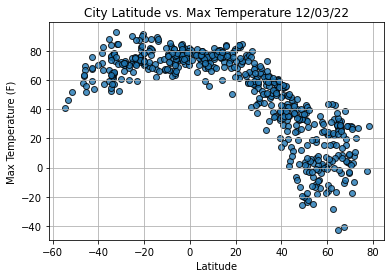

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

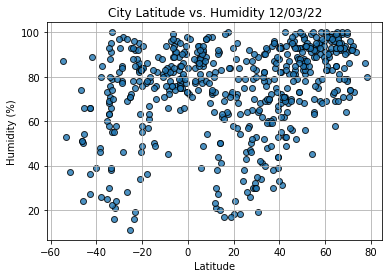

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

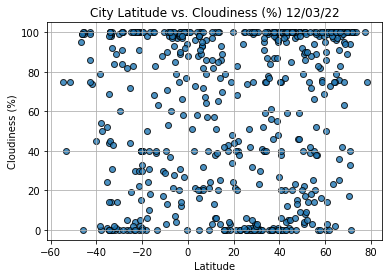

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

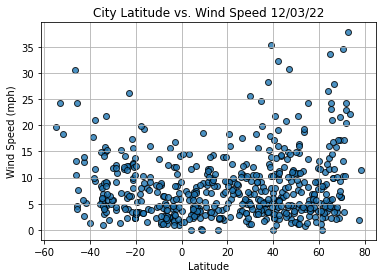

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Siatista,40.2619,21.5442,38.98,94,100,2.24,GR,2022-12-04 00:14:33
3,Kapaa,22.0752,-159.3190,82.72,68,40,12.66,US,2022-12-04 00:14:34
4,Naze,28.3667,129.4833,68.90,79,99,3.18,JP,2022-12-04 00:14:34
7,Qui Nhon,13.7667,109.2333,75.42,91,100,9.89,VN,2022-12-04 00:14:36
9,Yellowknife,62.4560,-114.3525,16.27,96,100,8.41,CA,2022-12-04 00:14:36
...,...,...,...,...,...,...,...,...,...
546,Ewa Beach,21.3156,-158.0072,84.15,57,20,16.11,US,2022-12-04 00:18:56
548,Ratne,51.6683,24.5303,28.08,94,99,10.87,UA,2022-12-04 00:18:57
549,Nibong Tebal,5.1659,100.4779,80.29,92,91,3.94,MY,2022-12-04 00:18:57
550,Djenne,13.9061,-4.5533,79.48,50,77,9.55,ML,2022-12-04 00:18:58


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Siatista,40.2619,21.5442,38.98,94,100,2.24,GR,2022-12-04 00:14:33
3,Kapaa,22.0752,-159.3190,82.72,68,40,12.66,US,2022-12-04 00:14:34
4,Naze,28.3667,129.4833,68.90,79,99,3.18,JP,2022-12-04 00:14:34
7,Qui Nhon,13.7667,109.2333,75.42,91,100,9.89,VN,2022-12-04 00:14:36
9,Yellowknife,62.4560,-114.3525,16.27,96,100,8.41,CA,2022-12-04 00:14:36


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

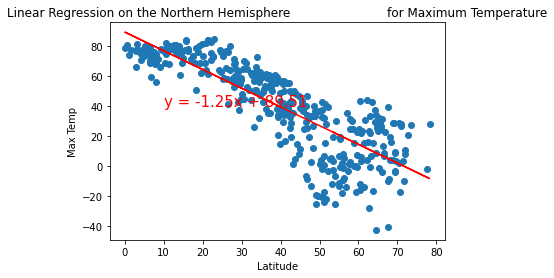

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

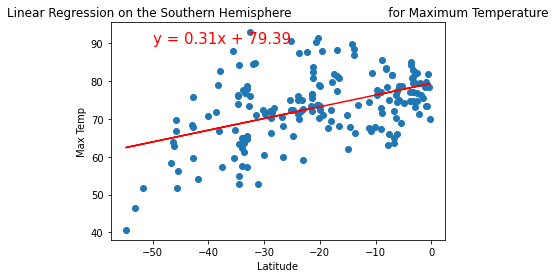

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))